In [1]:
import datetime
import re

import numpy
import pandas
import matplotlib.pyplot
import matplotlib.dates

dfany = pandas.read_csv("pip-counts-any.csv", parse_dates=[0], infer_datetime_format=True)
dfsci = pandas.read_csv("pip-counts-scientific-linux.csv", parse_dates=[0], infer_datetime_format=True)
dfos = pandas.read_csv("pip-counts-by-os.csv", parse_dates=[0], infer_datetime_format=True)

In [2]:
dfos.groupby("project").count().sort_values("count", ascending=False)

,date,os,version,count
project,,,,
numpy,65507,65507,65507,65507
scipy,53751,53751,53751,53751
pandas,52245,52245,52245,52245
tensorflow,45917,45917,45917,45917
matplotlib,41499,41499,41499,41499
scikit-learn,34454,34452,34454,34454
torch,10193,10193,10193,10193
iminuit,2967,2967,2967,2967
uproot,2365,2365,2365,2365


In [3]:
def plotit(df, vertical, title, selection, islog=True, dropminuit=False, dropml=False, dropmine=False):
    which = ["numpy", "scipy", "pandas", "matplotlib", "tensorflow", "scikit-learn", "torch", "uproot", "awkward", "iminuit"]
    if dropminuit:
        del which[which.index("iminuit")]
    if dropml:
        del which[which.index("tensorflow")]
        del which[which.index("scikit-learn")]
        del which[which.index("torch")]
    if dropmine:
        del which[which.index("uproot")]
        del which[which.index("awkward")]
    if selection is not None:
        df = df[df["os"] == selection]
    df = df.groupby(["date", "project"])["count"].sum().unstack()[which]
    ax = df.fillna(0).rolling(30).mean().plot(figsize=(10, 4))
    matplotlib.pyplot.title(title)
    if islog:
        matplotlib.pyplot.yscale("log")
    matplotlib.pyplot.xlabel("")
    matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", frameon=False)
    ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
    ax.set_ylim((0.01, vertical))
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
    return ax

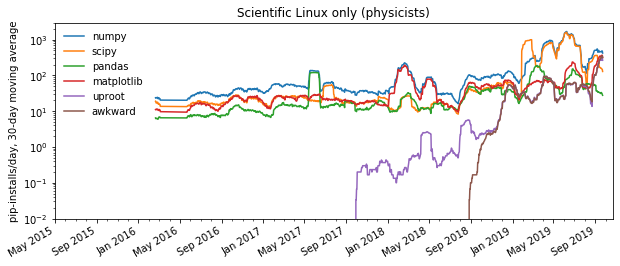

In [4]:
ax = plotit(dfsci, 3000, "Scientific Linux only (physicists)", None, dropminuit=True, dropml=True)
ax.get_figure().savefig("pip-scilinux-uproot.png")
ax.get_figure().savefig("pip-scilinux-uproot.pdf")

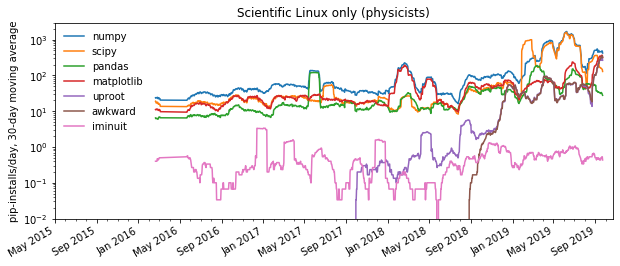

In [5]:
ax = plotit(dfsci, 3000, "Scientific Linux only (physicists)", None, dropminuit=False, dropml=True)
ax.get_figure().savefig("pip-scilinux-uproot-iminuit.png")
ax.get_figure().savefig("pip-scilinux-uproot-iminuit.pdf")

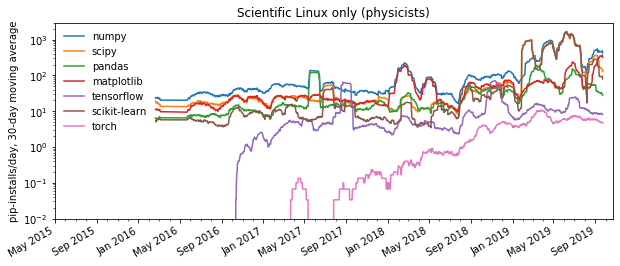

In [6]:
ax = plotit(dfsci, 3000, "Scientific Linux only (physicists)", None, dropminuit=True, dropmine=True, dropml=False)
ax.get_figure().savefig("pip-scilinux-ml.png")
ax.get_figure().savefig("pip-scilinux-ml.pdf")

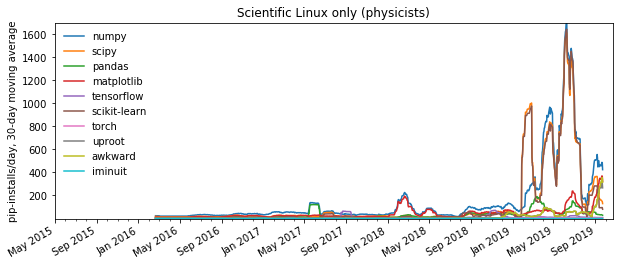

In [7]:
ax = plotit(dfsci, 1700, "Scientific Linux only (physicists)", None, islog=False)
ax.get_figure().savefig("pip-scilinux-linear.png")
ax.get_figure().savefig("pip-scilinux-linear.pdf")

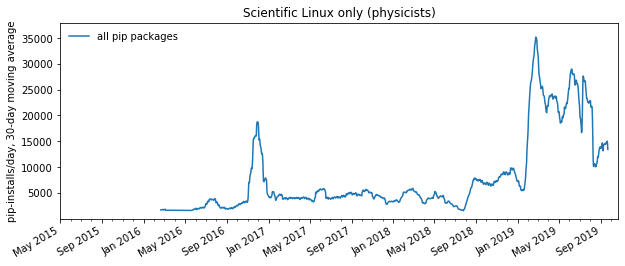

In [8]:
ax = dfany.groupby(["date"])["count"].sum().rolling(30).mean().plot(figsize=(10, 4))
matplotlib.pyplot.title("Scientific Linux only (physicists)")
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("pip-installs/day, 30-day moving average")
handles, labels = ax.get_legend_handles_labels()
ax.legend(["all pip packages"], loc="upper left", frameon=False)
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.set_ylim((0.01, 38000))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.get_figure().savefig("pip-scilinux-everything.png")
ax.get_figure().savefig("pip-scilinux-everything.pdf")

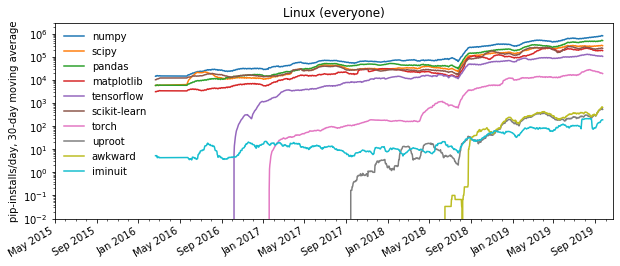

In [9]:
ax = plotit(dfos, 3000000, "Linux (everyone)", "Linux")
ax.get_figure().savefig("pip-linux.png")
ax.get_figure().savefig("pip-linux.pdf")

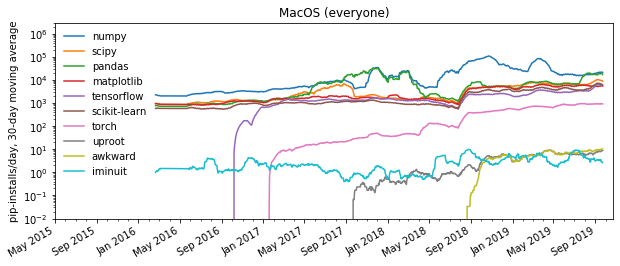

In [10]:
ax = plotit(dfos, 3000000, "MacOS (everyone)", "Darwin")
ax.get_figure().savefig("pip-macos.png")
ax.get_figure().savefig("pip-macos.pdf")

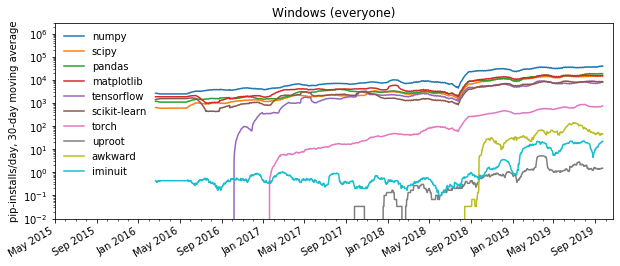

In [11]:
ax = plotit(dfos, 3000000, "Windows (everyone)", "Windows")
ax.get_figure().savefig("pip-windows.png")
ax.get_figure().savefig("pip-windows.pdf")

In [4]:
dfuproot = pandas.read_csv("github-issues-uproot.csv", parse_dates=[4, 5], infer_datetime_format=True)
dfmethods = pandas.read_csv("github-issues-uproot-methods.csv", parse_dates=[4, 5], infer_datetime_format=True)
dfawkward = pandas.read_csv("github-issues-awkward.csv", parse_dates=[4, 5], infer_datetime_format=True)

dfuproot["package"] = "uproot"
dfmethods["package"] = "uproot-methods"
dfawkward["package"] = "awkward-array"
for df in dfuproot, dfmethods, dfawkward:
    df["opened"] = 1
    df["closed"] = df["state"].apply(lambda x: 1 if x == "closed" else 0)

dfissues = pandas.concat([dfuproot, dfmethods, dfawkward])

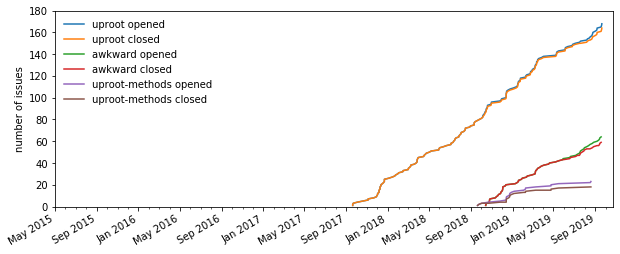

In [13]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10, 4))
for df in dfuproot, dfawkward, dfmethods:
    df[["date_created", "opened", "closed"]][~df["ispull"] & ~numpy.isin(df["user"], ["jpivarski", "reikdas"])].set_index("date_created", inplace=False).sort_index().cumsum().plot(ax=ax)
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of issues")
handles, labels = ax.get_legend_handles_labels()
ax.legend(["uproot opened", "uproot closed", "awkward opened", "awkward closed", "uproot-methods opened", "uproot-methods closed"], loc="upper left", frameon=False)
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.set_ylim((0, 180))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.get_figure().savefig("uproot-issues.png")
ax.get_figure().savefig("uproot-issues.pdf")

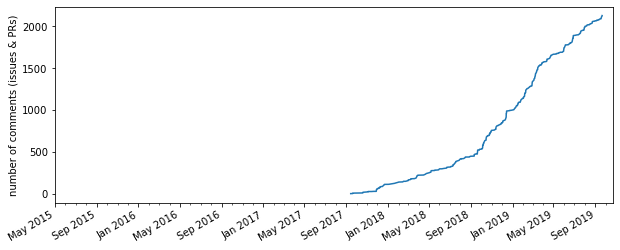

In [14]:
ax = dfissues[["date_created", "numcomments"]].set_index("date_created", inplace=False).sort_index().cumsum().plot(figsize=(10, 4))
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of comments (issues & PRs)")
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.get_figure().savefig("uproot-comments.png")
ax.get_figure().savefig("uproot-comments.pdf")

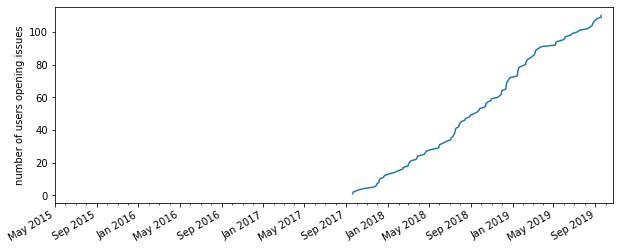

In [15]:
ax = dfissues[["user", "date_created", "opened"]][~dfissues["ispull"]].groupby("user").min().set_index("date_created", inplace=False).sort_index().cumsum().plot(figsize=(10, 4))
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of users opening issues")
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
ax.set_xlim((datetime.date(2015, 5, 1), datetime.date(2019, 10, 22)))
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(bymonth=[1, 5, 9]))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.get_figure().savefig("uproot-users.png")
ax.get_figure().savefig("uproot-users.pdf")

In [16]:
dfos.groupby(["os"]).count().sort_values("count", ascending=False);

In [5]:
dfgit = pandas.read_csv("github-cmssw.csv", parse_dates=[3], infer_datetime_format=True)
dfgit.columns

Index(['repo', 'owner', 'isfork', 'created', 'language'], dtype='object')

In [6]:
dfgit["lang"] = dfgit["language"].apply(lambda x: {
    "'C++'": "C/C++", "'C'": "C/C++", "'C#'": "C/C++", "'Objective-C'": "C/C++",
    "'Python'": "Python",
    "'Jupyter Notebook'": "Jupyter",
    "'HTML'": "HTML/CSS/JS", "'CSS'": "HTML/CSS/JS", "'JavaScript'": "HTML/CSS/JS", "'TypeScript'": "HTML/CSS/JS",
        "'CoffeeScript'": "HTML/CSS/JS", "'PHP'": "HTML/CSS/JS",
    "'Java'": "Java",
    "'TeX'": "TeX/LaTeX",
    "'Go'": "Go",
    "'VHDL'": "VHDL/Verilog", "'Verilog'": "VHDL/Verilog",
    "'R'": "R",
    "'Fortran'": "Fortran", "'FORTRAN'": "Fortran",
    "'Matlab'": "Matlab", "'MATLAB'": "Matlab",
    "'Julia'": "Julia",
    "'Mathematica'": "Mathematica",
    "None": "(unknown)",
    }.get(x, "(other)"))
which = ["C/C++", "Python", "Jupyter", "(unknown)", "(other)", "HTML/CSS/JS", "Java", "TeX/LaTeX", "Go", "VHDL/Verilog", "R", "Fortran", "Matlab", "Julia", "Mathematica"]

In [7]:
dfgit.groupby("lang").count().sort_values("repo", ascending=False);

In [8]:
summary = dfgit[~dfgit["isfork"]]["lang"].groupby([dfgit["created"].dt.to_period("M"), dfgit["lang"]]).count().unstack().fillna(0)
summary = summary[reversed(which)]
summary;

In [9]:
color_cycle = (matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color'] * 2)[:len(which)]
color_cycle[0] = "#4e9fd9"
color_cycle[3] = "#ffff00"
color_cycle[4] = "#ff8080"
color_cycle = list(reversed(color_cycle))

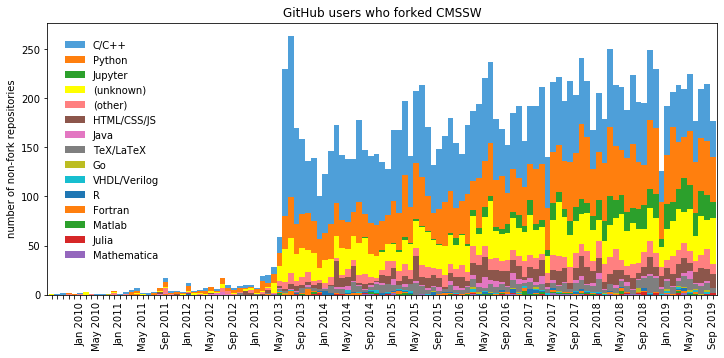

In [10]:
ax = summary.plot.bar(width=1, stacked=True, figsize=(12, 5), color=color_cycle)
labels = []
for x in ax.xaxis.get_ticklabels():
    if x.get_text()[:4] != "2009" and x.get_text().endswith("-01"):
        labels.append("Jan " + x.get_text()[:4])
    elif x.get_text()[:4] != "2009" and x.get_text().endswith("-05"):
        labels.append("May " + x.get_text()[:4])
    elif x.get_text()[:4] != "2009" and x.get_text().endswith("-09"):
        labels.append("Sep " + x.get_text()[:4])
    else:
        labels.append("")
ax.set_xticklabels(labels)
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("number of non-fork repositories")
matplotlib.pyplot.title("GitHub users who forked CMSSW")
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[labels.index(x)] for x in which], which, loc="upper left", frameon=False, borderpad=1.25)
ax.get_figure().savefig("github-linear.png")
ax.get_figure().savefig("github-linear.pdf")

In [11]:
summary2 = summary.copy()
total = numpy.zeros(len(summary), dtype=float)
for x in which:
    total += summary2[x]
for x in which:
    summary2[x] = summary2[x] / total
summary2 = summary2.fillna(0)

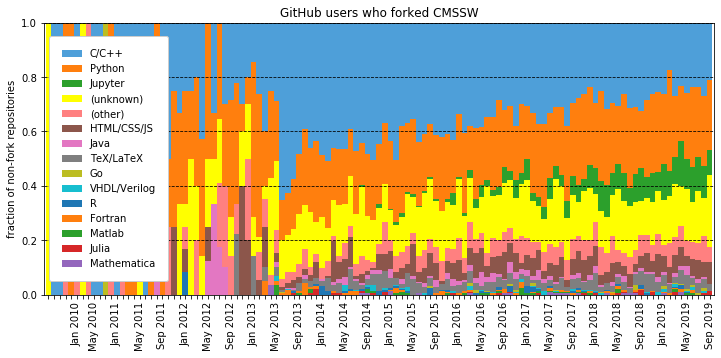

In [12]:
ax = summary2.plot.bar(width=1, stacked=True, figsize=(12, 5), color=color_cycle)
labels = []
for x in ax.xaxis.get_ticklabels():
    if x.get_text()[:4] != "2009" and x.get_text().endswith("-01"):
        labels.append("Jan " + x.get_text()[:4])
    elif x.get_text()[:4] != "2009" and x.get_text().endswith("-05"):
        labels.append("May " + x.get_text()[:4])
    elif x.get_text()[:4] != "2009" and x.get_text().endswith("-09"):
        labels.append("Sep " + x.get_text()[:4])
    else:
        labels.append("")
ax.set_xticklabels(labels)
ax.yaxis.grid(color="black", linestyle="--")
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("fraction of non-fork repositories")
matplotlib.pyplot.title("GitHub users who forked CMSSW")
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[labels.index(x)] for x in which], which, loc="center left", frameon=True, framealpha=1, borderpad=1.25)
ax.set_ylim((0, 1))
ax.get_figure().savefig("github-fraction.png")
ax.get_figure().savefig("github-fraction.pdf")

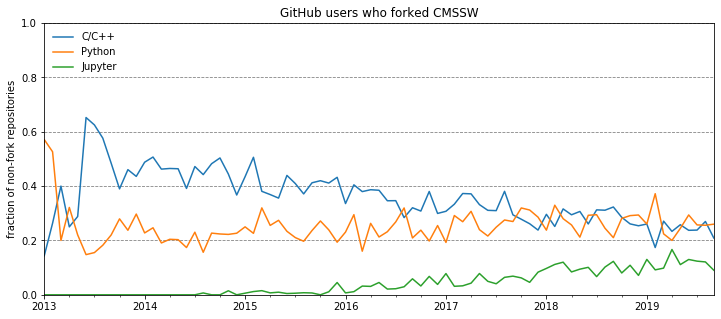

In [15]:
ax = summary2[["C/C++", "Python", "Jupyter"]].plot(figsize=(12, 5))
ax.yaxis.grid(color="gray", linestyle="--")
matplotlib.pyplot.xlabel("")
matplotlib.pyplot.ylabel("fraction of non-fork repositories")
matplotlib.pyplot.title("GitHub users who forked CMSSW")
ax.set_ylim((0, 1))
ax.set_xlim((516, 596))
ax.legend(loc="upper left", frameon=False)
ax.get_figure().savefig("github-simplefraction.png")
ax.get_figure().savefig("github-simplefraction.pdf")